In [1]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import sweetviz as sv 

import warnings
warnings.filterwarnings('ignore')

In [25]:
# reading data
P_256_T=pd.read_csv('co2_emissions (1).csv',sep=';')
P_256_T

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [26]:
P_256_show=pd.read_csv('co2_emissions (1).csv')
P_256_show

,make;model;vehicle_class;engine_size;cylinders;transmission;fuel_type;fuel_consumption_city;fuel_consumption_hwy;fuel_consumption_comb(l/100km);fuel_consumption_comb(mpg);co2_emissions
0,ACURA;ILX;COMPACT;2;4;AS;Z;9.9;6.7;8.5;33;196
1,ACURA;ILX;COMPACT;2.4;4;M;Z;11.2;7.7;9.6;29;221
2,ACURA;ILX HYBRID;COMPACT;1.5;4;AV;Z;6;5.8;5.9;...
3,ACURA;MDX 4WD;SUV - SMALL;3.5;6;AS;Z;12.7;9.1;...
4,ACURA;RDX AWD;SUV - SMALL;3.5;6;AS;Z;12.1;8.7;...
...,...
7380,VOLVO;XC40 T5 AWD;SUV - SMALL;2;4;AS;Z;10.7;7....
7381,VOLVO;XC60 T5 AWD;SUV - SMALL;2;4;AS;Z;11.2;8....
7382,VOLVO;XC60 T6 AWD;SUV - SMALL;2;4;AS;Z;11.7;8....
7383,VOLVO;XC90 T5 AWD;SUV - STANDARD;2;4;AS;Z;11.2...


## Exploratory Data Analysis

In [27]:
# getting basic info about the data given
P_256_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [28]:
# converting cylinders from numerical column to Catagorical column
P_256_T['cylinders']=P_256_T['cylinders'].astype('object')
print(P_256_T.dtypes['cylinders'])

object


In [30]:
# Droping duplicate values from data and reseting index
P_256_T = P_256_T.drop_duplicates().reset_index(drop=True)
P_256_T

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [7]:
# discription about individual features of data
P_256_T.describe()

,engine_size,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,3.163000,12.615591,9.073426,11.022111,27.395026,251.247250
std,1.365294,3.550572,2.277893,2.945028,7.225472,59.235396
min,0.900000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
# Slicing Data without target variable *to find correlation b/w indipendent variables*
P_256=P_256_T.iloc[:,:11]
P_256

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29


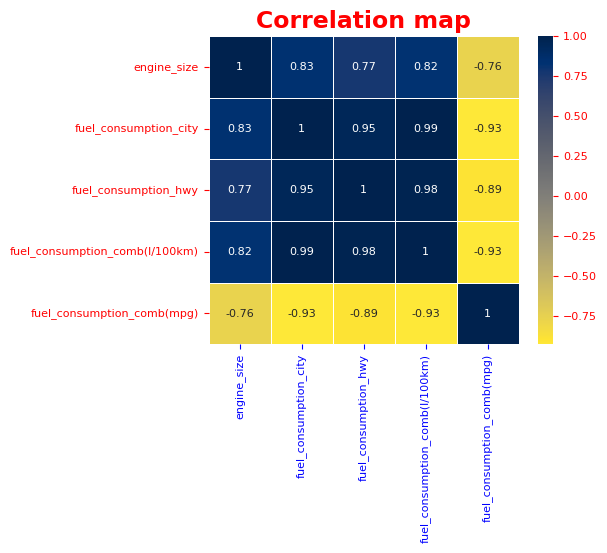

In [9]:
#Correlation between the features using "HEAT MAP"

plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['font.size'] = 8
plt.rcParams['xtick.color'] = 'blue'
plt.rcParams['ytick.color'] = 'red'
sns.heatmap(P_256.corr(),annot=True, cmap = 'cividis_r',alpha=1,linewidths=.4)
plt.title('Correlation map', color = 'r', fontsize = 17, fontweight = 'bold')
plt.show()

In [140]:
# #Visualization Sub-Plot settings

plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 16

In [141]:
# #Ploting distribution plot for each numerical columns

# risk = P_256.select_dtypes(exclude='object').columns
# for i,factor in enumerate(risk):
#     plt.subplot(3,2,i+1)
#     sns.distplot(P_256[factor],bins=15,kde_kws={'color':'red','alpha':.2,'fill':True},hist_kws={'color':'blue','alpha':.6})
 

In [142]:
# #Generating Automated EDA report using Pandas Profiling library
# EDA_report_p_256_T= pp.ProfileReport(P_256_T)
# EDA_report_p_256_T.to_file(output_file='report.html') 
# EDA_report_p_256_T   

In [143]:
# # Generating Automated EDA report using "SWEETVIZ" library

# sweet_report=sv.analyze(P_256_T)
# sweet_report.show_html()

### Pre-processing

In [144]:
# seperating numerical features for scaling and outlier treatment as well as 
# dimension reduction
P_256_numerics=P_256.select_dtypes(exclude='object')
P_256_numerics_columns=P_256.select_dtypes(exclude='object').columns
P_256_numerics

,engine_size,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,2.0,9.9,6.7,8.5,33
1,2.4,11.2,7.7,9.6,29
2,1.5,6.0,5.8,5.9,48
3,3.5,12.7,9.1,11.1,25
4,3.5,12.1,8.7,10.6,27
...,...,...,...,...,...
6268,2.0,10.7,7.7,9.4,30
6269,2.0,11.2,8.3,9.9,29
6270,2.0,11.7,8.6,10.3,27
6271,2.0,11.2,8.3,9.9,29


In [145]:
#Setting Thresholds for outlieres
thresholds= np.empty((0,5))

for i in P_256_numerics.columns:
    thresholds=np.append(thresholds,(np.mean(P_256_numerics[i])+3*np.std(P_256_numerics[i])))
print(thresholds)
print(type(P_256_numerics))

[ 7.25855578 23.26645632 15.90655885 19.85649169 49.06971534]
<class 'pandas.core.frame.DataFrame'>


In [146]:
# checking outliers which are 3 standard deviations away from mean
(np.where(P_256_numerics>thresholds))[0].size


255

In [147]:
# mean imputation 
P_256_numerics=pd.DataFrame(np.where(P_256_numerics>thresholds,np.mean(P_256_numerics),P_256_numerics),columns=P_256_numerics_columns)
print(type(P_256_numerics))

<class 'pandas.core.frame.DataFrame'>


In [148]:
# checking outliers which are 3 standard deviations away from mean
(np.where(P_256_numerics>thresholds))[0].size

0

--imputed outliers with mean

In [149]:
# importing Robust scaler
from sklearn.preprocessing import RobustScaler

In [150]:
# Initialize the RobustScaler
scaler = RobustScaler()

In [151]:
# Loop through each numerical column and apply the RobustScaler
for i in P_256_numerics.columns:
    P_256_numerics[i] = scaler.fit_transform(P_256_numerics[[i]])

In [152]:
P_256_numerics

,engine_size,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,-0.588235,-0.500000,-0.740741,-0.567568,0.666667
1,-0.352941,-0.204545,-0.370370,-0.270270,0.222222
2,-0.882353,-1.386364,-1.074074,-1.270270,2.333333
3,0.294118,0.136364,0.148148,0.135135,-0.222222
4,0.294118,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
6268,-0.588235,-0.318182,-0.370370,-0.324324,0.333333
6269,-0.588235,-0.204545,-0.148148,-0.189189,0.222222
6270,-0.588235,-0.090909,-0.037037,-0.081081,0.000000
6271,-0.588235,-0.204545,-0.148148,-0.189189,0.222222


In [14]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA(n_components = 3)
P_256_PCA = pca.fit_transform(P_256_numerics)
P_256_PCA

array([[-1.53603261e+00,  1.86152830e-02,  2.24223612e-03],
       [-8.03855342e-01, -7.07372285e-02,  1.37351903e-01],
       [-3.25203423e+00,  3.63561391e-01, -1.02223589e+00],
       ...,
       [-5.21994866e-01, -4.84953333e-01,  1.93599121e-01],
       [-7.68529861e-01, -3.77557316e-01,  7.55043336e-02],
       [-3.56381163e-01, -5.52790440e-01,  2.34173291e-01]])

In [155]:
# Cumulative variance 
info = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
info

array([90.07, 96.06, 98.3 ])

In [156]:
P_256_PCA = pd.DataFrame(P_256_PCA[:,0:2],columns=['PC1','PC2'])
P_256_PCA

,PC1,PC2
0,-1.536033,0.018615
1,-0.803855,-0.070737
2,-3.252034,0.363561
3,0.246612,0.118814
4,-0.039620,0.249227
...,...,...
6268,-1.031023,-0.236375
6269,-0.768530,-0.377557
6270,-0.521995,-0.484953
6271,-0.768530,-0.377557


In [12]:
# seperating catagorical features for encoding
P_256_cata=P_256.select_dtypes('object')
P_256_cata

,make,model,vehicle_class,cylinders,transmission,fuel_type
0,ACURA,ILX,COMPACT,4,AS,Z
1,ACURA,ILX,COMPACT,4,M,Z
2,ACURA,ILX HYBRID,COMPACT,4,AV,Z
3,ACURA,MDX 4WD,SUV - SMALL,6,AS,Z
4,ACURA,RDX AWD,SUV - SMALL,6,AS,Z
...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,4,AS,Z
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,4,AS,Z
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,4,AS,Z
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,4,AS,Z


In [15]:
import sklearn
le=sklearn.preprocessing.LabelEncoder()

In [16]:
for i in P_256_cata.columns:
    P_256_cata[i] = le.fit_transform(P_256_cata[i])

In [17]:
P_256_cata

,make,model,vehicle_class,cylinders,transmission,fuel_type
0,0,1057,0,1,2,4
1,0,1057,0,1,4,4
2,0,1058,0,1,3,4
3,0,1233,11,3,2,4
4,0,1499,11,3,2,4
...,...,...,...,...,...,...
6268,41,1951,11,1,2,4
6269,41,1957,11,1,2,4
6270,41,1960,11,1,2,4
6271,41,1968,12,1,2,4


In [211]:
P_256_final=pd.concat([P_256_cata,P_256_PCA],axis=1)
P_256_final

,make,model,vehicle_class,cylinders,transmission,fuel_type,PC1,PC2
0,0,1057,0,1,2,4,-1.536033,0.018615
1,0,1057,0,1,4,4,-0.803855,-0.070737
2,0,1058,0,1,3,4,-3.252034,0.363561
3,0,1233,11,3,2,4,0.246612,0.118814
4,0,1499,11,3,2,4,-0.039620,0.249227
...,...,...,...,...,...,...,...,...
6268,41,1951,11,1,2,4,-1.031023,-0.236375
6269,41,1957,11,1,2,4,-0.768530,-0.377557
6270,41,1960,11,1,2,4,-0.521995,-0.484953
6271,41,1968,12,1,2,4,-0.768530,-0.377557


In [212]:
# Diclaring Target and indipendent variables and spliting data
y=P_256_T['co2_emissions']
x=P_256_final

In [213]:
#importing methods for Spliting data as test and train 
from sklearn.model_selection import train_test_split

In [214]:
# Spliting data as test and train 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [215]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(x_train)
# X_test_scaled = scaler.transform(x_test)

In [222]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Ridge Regression
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

# Neural Network Regression
neural_net_reg = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
neural_net_reg.fit(x_train, y_train)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

# Random Forest Regression
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train, y_train)

# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train)

# # Support Vector Machines (SVM) Regression
# svm_reg = SVR(kernel='rbf')
# svm_reg.fit(x_train, y_train)


KNeighborsRegressor()

In [223]:
# Step 6: Model Evaluation
models = {
    'Linear Regression': linear_reg,
    'Ridge Regression': ridge_reg,
    'Neural Network Regression': neural_net_reg,
    'Lasso Regression': lasso_reg,
    'Decision Tree Regression': tree_reg,
    'Random Forest Regression': forest_reg,
    'KNN Regression': knn_reg,
}

In [224]:
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test_scaled.shape[0]
    p = X_test_scaled.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f'{model_name} Mean Squared Error:', math.pow(mse,0.5))
    print(f'{model_name} R-squared Score:', r2)
    print(f'{model_name} Adjusted R-squared Score:', adjusted_r2)
    print('/n')
    print('/n')

Linear Regression Mean Squared Error: 21.26578404564229
Linear Regression R-squared Score: 0.8738355104496087
Linear Regression Adjusted R-squared Score: 0.8730254655728806
/n
/n
Ridge Regression Mean Squared Error: 21.26582110134885
Ridge Regression R-squared Score: 0.8738350707650557
Ridge Regression Adjusted R-squared Score: 0.8730250230653129
/n
/n
Neural Network Regression Mean Squared Error: 22.017603180416014
Neural Network Regression R-squared Score: 0.8647571180359903
Neural Network Regression Adjusted R-squared Score: 0.863888784925467
/n
/n
Lasso Regression Mean Squared Error: 21.287529471231895
Lasso Regression R-squared Score: 0.8735773583680081
Lasso Regression Adjusted R-squared Score: 0.8727656560140307
/n
/n
Decision Tree Regression Mean Squared Error: 8.436767117679834
Decision Tree Regression R-squared Score: 0.980142413684666
Decision Tree Regression Adjusted R-squared Score: 0.9800149171433156
/n
/n
Random Forest Regression Mean Squared Error: 5.360029857804791
Ran